In [33]:
# Main variables

PATH_TO_SIGNALS = r'U:\py\sounds-phd\02_data\00_raw_signals'
Ttot = 10   # [s]
SNRs = np.arange(start=-2,stop=5) * 5
FS = 16000
exportFolder = './00_exported_signals'

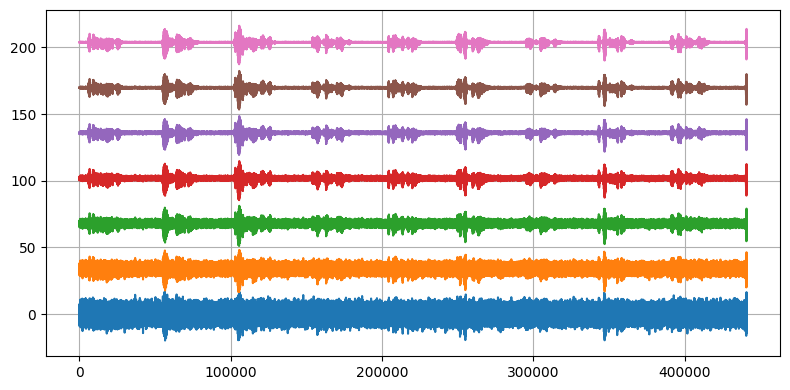

In [34]:
# Build signals

# Get clean speech file
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')
import numpy as np
import resampy
from scipy.io import wavfile

speechFile = f'{PATH_TO_SIGNALS}/01_speech/speech1.wav'
s, fs = sf.read(speechFile)
if s.ndim == 2:
    s = s[:, 0]
# Resample
s = resampy.core.resample(s, fs, FS)

noiseFile = f'{PATH_TO_SIGNALS}/02_noise/whitenoise_signal_1.wav'
n, fs2 = sf.read(noiseFile)
if n.ndim == 2:
    n = n[:, 0]
# Resample
n = resampy.core.resample(n, fs, FS)

# Normalize
s = (s - np.mean(s)) / np.std(s)
n = (n - np.mean(n)) / np.std(n)

# Truncate
s = s[:int(fs * Ttot)]
n = n[:int(fs * Ttot)]
wavfile.write(f'{exportFolder}/ref.wav', FS, s)

# Apply SNRs and add
x = np.zeros((len(s), len(SNRs)))
for ii in range(len(SNRs)):
    x[:, ii] = s + n * 10**(-SNRs[ii] / 20)

# Plot
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for ii in range(len(SNRs)):
    ax.plot(x[:, ii] + ii * 2 * np.amax(x))
ax.grid()
plt.tight_layout()	
plt.show()

# Export signals
for ii in range(len(SNRs)):
    wavfile.write(f'{exportFolder}/out{SNRs[ii]}dB.wav', FS, x[:, ii])

In [35]:
# Compute PESQ
from pesq import pesq

pesqs = np.zeros(len(SNRs))
for ii in range(len(SNRs)):
    pesqs[ii] = pesq(FS, s, x[:, ii], 'wb')

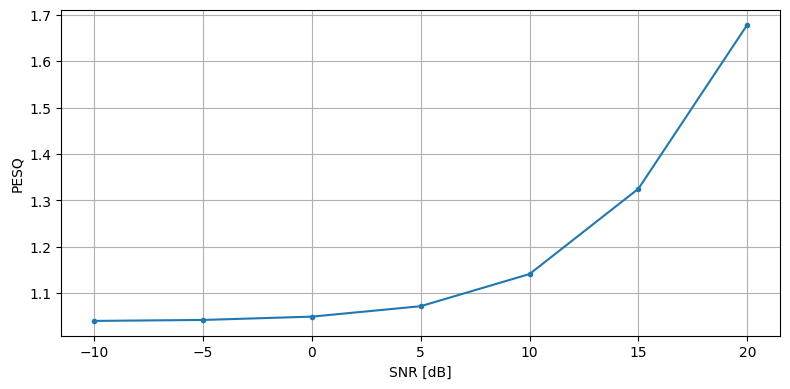

In [36]:
# Plot PESQ

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(SNRs, pesqs, '.-')
ax.grid()
plt.xlabel('SNR [dB]')
plt.ylabel('PESQ')
plt.tight_layout()	
plt.show()